# Objective: 
The COVID-19 pandemic is unprecedented, and the impact varied across different sectors. Firms have tried to tackle the pandemic using a diverse set of policies. 
Assuming the role of a social media analyst, the objective of this study is to understand how consumers have spoken about our firm across different timelines. The technology firm selected is UBER which is a car rental service. It is important to understand the customer behaviour and preferences.
## Methodology: 
Extracting tweets using Sprinkler for the three time periods and then perform the sentiment Analysis using dictionary-based approach. Then applying text pre-processing steps on the data collected and performing Topic modelling using LDA. Interpreting the topics and comparing them across the time periods.
Data Collection:  Sprinkler tool was used to get twitter messages from the three time periods. We focussed on the Tweets of English language originating from India. Also, keyword used was ‘Uber’ to get sufficient tweets (>5000) for the analysis.
•	Pre - COVID data extraction timeline (Jan 2020) – 17736 Tweets
•	Lockdown data extraction timeline (March 25th – 31st May 2020) – 11974 Tweets
•	Post lockdown data extraction timeline (Jan 2021) - 6881 Tweets


In [1]:
from os import listdir
from os.path import join
import pandas as pd
import numpy as np
import nltk.corpus 
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

import re 
import string
import math
import os
from pprint import pprint
import seaborn as sn
from textblob import TextBlob
from afinn import Afinn
import text2emotion as te
import sys
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score


from sklearn.model_selection import train_test_split
import requests
from lxml import html
import matplotlib.pyplot as plt

import nltk

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel



# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kanik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Reading the data

In [2]:
Pre_COVID_data= pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/Pre_COVID-data-extraction-timeline_Jan_2020.csv",index_col=False, encoding= 'unicode_escape')

C:\Users\kanik\anaconda3\lib\encodings\unicode_escape.py:26: DeprecationWarning: invalid escape sequence '\,'
  return codecs.unicode_escape_decode(input, self.errors)[0]
C:\Users\kanik\anaconda3\lib\encodings\unicode_escape.py:26: DeprecationWarning: invalid escape sequence '\O'
  return codecs.unicode_escape_decode(input, self.errors)[0]
C:\Users\kanik\anaconda3\lib\encodings\unicode_escape.py:26: DeprecationWarning: invalid escape sequence '\,'
  return codecs.unicode_escape_decode(input, self.errors)[0]


In [3]:
lockdown_data= pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/Lockdown-data-extraction-timeline-March_25th-31st_May2020.csv",index_col=False, encoding= 'unicode_escape')

C:\Users\kanik\anaconda3\lib\encodings\unicode_escape.py:26: DeprecationWarning: invalid escape sequence '\/'
  return codecs.unicode_escape_decode(input, self.errors)[0]


In [4]:
Post_lockdown_data= pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/Post_lockdown-data-extraction-timeline_Jan_2021.csv",index_col=False, encoding= 'unicode_escape')

C:\Users\kanik\anaconda3\lib\encodings\unicode_escape.py:26: DeprecationWarning: invalid escape sequence '\_'
  return codecs.unicode_escape_decode(input, self.errors)[0]
C:\Users\kanik\anaconda3\lib\encodings\unicode_escape.py:26: DeprecationWarning: invalid escape sequence '\ '
  return codecs.unicode_escape_decode(input, self.errors)[0]
C:\Users\kanik\anaconda3\lib\encodings\unicode_escape.py:26: DeprecationWarning: invalid escape sequence '\O'
  return codecs.unicode_escape_decode(input, self.errors)[0]
C:\Users\kanik\anaconda3\lib\encodings\unicode_escape.py:26: DeprecationWarning: invalid escape sequence '\/'
  return codecs.unicode_escape_decode(input, self.errors)[0]


In [5]:
pd.DataFrame(Pre_COVID_data)

,UniversalMessageId,SocialNetwork,SenderUserId,SenderScreenName,SenderListedName,SenderProfileImgUrl,SenderProfileLink,Sender Followers Count,SenderInfluencerScore,SenderAge,...,Associated Cases,Location,Country,State,City,Latitude,Longitude,Sender Email,Message Type,CampaignName
0,TWITTER_7_1223312052862631936,TWITTER,4674078396,DiptenduKDas,Diptendu Das (?????????? ???) ????,https://pbs.twimg.com/profile_images/999223987...,NaN,62,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
1,TWITTER_4_1223311994746372096,TWITTER,1048130853396774912,KhyatiA91728339,Khyati Arora,https://abs.twimg.com/sticky/default_profile_i...,NaN,3,NaN,NaN,...,NaN,"New Delhi, NCT, India",India,NaN,NaN,28.63576,77.22445,NaN,Twitter Mention,NaN
2,TWITTER_4_1223311876802539520,TWITTER,163333963,prashant2saxena,Prashant Saxena,https://pbs.twimg.com/profile_images/131492815...,NaN,432,NaN,NaN,...,NaN,"Greater Noida, Uttar Pradesh, India",India,NaN,NaN,28.49615,77.53601,NaN,Twitter Mention,NaN
3,TWITTER_7_1223310046605348864,TWITTER,902096535759892480,Rohit_Rajputtt,Baldev,https://pbs.twimg.com/profile_images/965805531...,NaN,8,NaN,NaN,...,NaN,"New Delhi, NCT, India",India,NaN,NaN,28.63576,77.22445,NaN,Twitter Reply,NaN
4,TWITTER_7_1223309781600886784,TWITTER,3257830302,tweetnibbler,?????,https://pbs.twimg.com/profile_images/117909673...,NaN,80,NaN,NaN,...,NaN,"New Delhi, NCT, India",India,NaN,NaN,28.63576,77.22445,NaN,Twitter Reply,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17731,TWITTER_7_1212087425435963392,TWITTER,1567735622,SonuSidh_,Sonu,https://pbs.twimg.com/profile_images/126853962...,NaN,208,NaN,NaN,...,NaN,"Hyderabad, Andhra Pradesh, India",India,NaN,NaN,17.38405,78.45636,NaN,Twitter Reply,NaN
17732,TWITTER_7_1212087000204857344,TWITTER,114700234,matrixjig,.,https://pbs.twimg.com/profile_images/129605782...,NaN,119,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
17733,TWITTER_7_1212084167367970816,TWITTER,822519714379341824,Harsh_S_Rajawat,Harsh Rajawat,https://pbs.twimg.com/profile_images/135682628...,NaN,88,NaN,NaN,...,NaN,"Pune, Maharashtra, India",India,NaN,NaN,18.51957,73.85535,NaN,Twitter Reply,NaN
17734,TWITTER_7_1212082583531487232,TWITTER,71697144,PadmanabhanKp,Padmanabhan,https://pbs.twimg.com/profile_images/130293242...,NaN,329,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN


In [6]:
pd.DataFrame(lockdown_data)

,UniversalMessageId,SocialNetwork,SenderUserId,SenderScreenName,SenderListedName,SenderProfileImgUrl,SenderProfileLink,Sender Followers Count,SenderInfluencerScore,SenderAge,...,Associated Cases,Location,Country,State,City,Latitude,Longitude,Sender Email,Message Type,CampaignName
0,TWITTER_7_1267160038700756992,TWITTER,111945233,ssshrc,Shekhar Shankar Singh,https://pbs.twimg.com/profile_images/124379886...,NaN,10,NaN,NaN,...,NaN,"Mumbai, Maharashtra, India",India,maharashtra,mumbai,19.07283,72.88261,NaN,Twitter Reply,NaN
1,TWITTER_7_1267159977946419205,TWITTER,52105181,sanjusmenon,sAnJu ????,https://pbs.twimg.com/profile_images/135657997...,NaN,353,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
2,TWITTER_7_1267159470255288320,TWITTER,52105181,sanjusmenon,sAnJu ????,https://pbs.twimg.com/profile_images/135657997...,NaN,353,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
3,TWITTER_7_1267155591790804994,TWITTER,794125504357900289,UberINSupport,Uber India Support,https://pbs.twimg.com/profile_images/103994046...,NaN,42918,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
4,TWITTER_7_1267154327874998276,TWITTER,794125504357900289,UberINSupport,Uber India Support,https://pbs.twimg.com/profile_images/103994046...,NaN,42918,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11969,TWITTER_7_1242524525482242048,TWITTER,76336935,GaneshPuttu,Average Joe,https://pbs.twimg.com/profile_images/136597536...,NaN,719,NaN,NaN,...,NaN,"Chennai, Tamil Nadu, India",India,NaN,NaN,13.08784,80.27847,NaN,Twitter Reply,NaN
11970,TWITTER_7_1242524188746731520,TWITTER,1032997249712881664,suhasdravindra,Suhas Ravindra,https://pbs.twimg.com/profile_images/125193236...,NaN,39,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
11971,TWITTER_7_1242522801757507584,TWITTER,76336935,GaneshPuttu,Average Joe,https://pbs.twimg.com/profile_images/136597536...,NaN,719,NaN,NaN,...,NaN,"Chennai, Tamil Nadu, India",India,NaN,NaN,13.08784,80.27847,NaN,Twitter Reply,NaN
11972,TWITTER_4_1242522346394488832,TWITTER,2387580564,iShubhamJ,CA. Shubham Jain,https://pbs.twimg.com/profile_images/867843286...,NaN,681,NaN,NaN,...,NaN,"Chandigarh, Chandigarh, India",India,NaN,NaN,30.73629,76.78840,NaN,Twitter Mention,NaN


In [7]:
pd.DataFrame(Post_lockdown_data)

,UniversalMessageId,SocialNetwork,SenderUserId,SenderScreenName,SenderListedName,SenderProfileImgUrl,SenderProfileLink,Sender Followers Count,SenderInfluencerScore,SenderAge,...,Associated Cases,Location,Country,State,City,Latitude,Longitude,Sender Email,Message Type,CampaignName
0,TWITTER_7_1355945187529252864,TWITTER,1318925946,imSMohite,Shreyas Mohite ?,https://pbs.twimg.com/profile_images/128021716...,NaN,132,NaN,NaN,...,NaN,"Mumbai, Maharashtra, India",India,Maharashtra,Mumbai,19.07283,72.88261,NaN,Twitter Reply,NaN
1,TWITTER_4_1355942674176466952,TWITTER,1352951466579910659,sakshamkumarjh7,saksham kumar jha,https://pbs.twimg.com/profile_images/135374429...,NaN,0,NaN,NaN,...,NaN,"Greater Noida, Uttar Pradesh, India",India,Uttar Pradesh,Greater Noida,28.49615,77.53601,NaN,Twitter Mention,NaN
2,TWITTER_7_1355938894194253827,TWITTER,1105174463451140096,sucheta1317,SuchetaB,https://pbs.twimg.com/profile_images/135969983...,NaN,447,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
3,TWITTER_4_1355938130155753472,TWITTER,46963846,prabhjeet_s,Prabhjeet Singh,https://pbs.twimg.com/profile_images/595880081...,NaN,692,NaN,NaN,...,NaN,"Gurgaon, Haryana, India",India,Haryana,Gurgaon,28.46010,77.02635,NaN,Twitter Mention,NaN
4,TWITTER_4_1355936835935997952,TWITTER,1921968096,mukeshrawat_,????s? ?????,https://pbs.twimg.com/profile_images/120014088...,NaN,20,NaN,NaN,...,NaN,"Gurgaon, Haryana, India",India,Haryana,Gurgaon,28.46010,77.02635,NaN,Twitter Mention,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6876,TWITTER_7_1344721037158658048,TWITTER,216319678,rajan10896,rajan kaushal,https://pbs.twimg.com/profile_images/221454677...,NaN,22,NaN,NaN,...,NaN,"Amritsar, Punjab, India",India,Punjab,Amritsar,31.62234,74.87534,NaN,Twitter Reply,NaN
6877,TWITTER_7_1344717421081284608,TWITTER,110990081,mukeshezy,Mukesh Rishi,https://pbs.twimg.com/profile_images/111747433...,NaN,20,NaN,NaN,...,NaN,"New Delhi, NCT, India",India,Delhi,Delhi,28.65195,77.23149,NaN,Twitter Reply,NaN
6878,TWITTER_7_1344715925438676992,TWITTER,1005996579621228544,Ashok_patriot,Ashok,https://pbs.twimg.com/profile_images/129707831...,NaN,5,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Reply,NaN
6879,TWITTER_4_1344712967472836608,TWITTER,133192842,vamsi_pamuri,Vamsi Krishna ??,https://pbs.twimg.com/profile_images/135736506...,NaN,919,NaN,NaN,...,NaN,India,India,NaN,NaN,20.00000,77.00000,NaN,Twitter Mention,NaN


In [8]:
Pre_COVID = Pre_COVID_data.loc[:,["Message", "Sentiment"]]

In [9]:
## checing the percentage distribution of Reviews for Pre-COVID time
(Pre_COVID['Sentiment'].value_counts()/len(Pre_COVID))*100

NEUTRAL     49.131710
NEGATIVE    44.869193
POSITIVE     5.999098
Name: Sentiment, dtype: float64

In [10]:
lockdown = lockdown_data.loc[:,["Message", "Sentiment"]]

In [11]:
## checing the percentage distribution of Reviews for Lockdown time
(lockdown['Sentiment'].value_counts()/len(lockdown))*100

NEUTRAL     68.047436
NEGATIVE    24.077167
POSITIVE     7.875397
Name: Sentiment, dtype: float64

In [12]:
Post_lockdown = Post_lockdown_data.loc[:,["Message", "Sentiment"]]

In [13]:
## checing the percentage distribution of Reviews for Post-Lockdown time
(Post_lockdown['Sentiment'].value_counts()/len(Post_lockdown))*100

NEUTRAL     47.769220
NEGATIVE    44.165092
POSITIVE     8.065688
Name: Sentiment, dtype: float64

##### comparing the sentiments accross time periods 

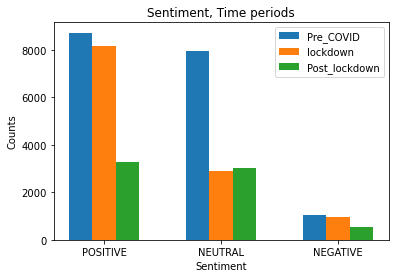

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

index = np.arange(3)
bar_width = 0.2
fig, ax = plt.subplots()

Pre_COVID_1 = ax.bar(index , Pre_COVID['Sentiment'].value_counts(), bar_width, label = "Pre_COVID")
lockdown_1 = ax.bar(index +0.2, lockdown['Sentiment'].value_counts(),bar_width, label ="lockdown")
Post_lockdown_1 = ax.bar(index + 0.4, Post_lockdown['Sentiment'].value_counts(),bar_width, label ="Post_lockdown")

ax.set_xlabel('Sentiment')
ax.set_ylabel('Counts')
ax.set_title('Sentiment, Time periods')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(["POSITIVE", "NEUTRAL", "NEGATIVE"])
ax.legend()
plt.show()


During the lockdown as the cab services were not operating the overall negative Sentiment were less in percentage as compared to other time periods. Some of these reviews might have originated from the drivers who were troubled with no income and having to pay EMI’s.
There were more of neutral messages where people mentioned uber in stating facts that the services are not available due to restrictions. 
The different sentiments across different time periods can be seen from the below graph.


In [15]:
# Tokenizing the text

Pre_COVID['Message_clean'] = Pre_COVID['Message'].apply(word_tokenize)
lockdown['Message_clean'] = lockdown['Message'].apply(word_tokenize)
Post_lockdown['Message_clean'] = Post_lockdown['Message'].apply(word_tokenize)

In [16]:
Pre_COVID

,Message,Sentiment,Message_clean
0,@Uber_Support Thanks for the support and looki...,POSITIVE,"[@, Uber_Support, Thanks, for, the, support, a..."
1,@Uber_Support i believe you should start showi...,NEGATIVE,"[@, Uber_Support, i, believe, you, should, sta..."
2,@Uber_India why its so tuff to reach your cust...,NEGATIVE,"[@, Uber_India, why, its, so, tuff, to, reach,..."
3,"@ola_supports @MertyMerriott Seems blocked, I ...",NEGATIVE,"[@, ola_supports, @, MertyMerriott, Seems, blo..."
4,"@khanumarfa Did you get it? But tudwa do, gh...",NEUTRAL,"[@, khanumarfa, Did, you, get, it, ?, But, tu..."
...,...,...,...
17731,@Uber_Support,NEUTRAL,"[@, Uber_Support]"
17732,@Gulrose_views @UnSubtleDesi Lol But Ola ho Ub...,POSITIVE,"[@, Gulrose_views, @, UnSubtleDesi, Lol, But, ..."
17733,"@luciferxgod Had my earplugs on, couldn't hear...",NEGATIVE,"[@, luciferxgod, Had, my, earplugs, on, ,, cou..."
17734,"To top off last year, Here is my mom being Ube...",NEUTRAL,"[To, top, off, last, year, ,, Here, is, my, mo..."


In [17]:
## Applying lemmatization on our text
ls= WordNetLemmatizer()
Pre_COVID['Message_clean'] = Pre_COVID['Message_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])

lockdown['Message_clean'] = lockdown['Message_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])

Post_lockdown['Message_clean'] = Post_lockdown['Message_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])

In [18]:
Pre_COVID

,Message,Sentiment,Message_clean
0,@Uber_Support Thanks for the support and looki...,POSITIVE,"[@, Uber_Support, Thanks, for, the, support, a..."
1,@Uber_Support i believe you should start showi...,NEGATIVE,"[@, Uber_Support, i, believe, you, should, sta..."
2,@Uber_India why its so tuff to reach your cust...,NEGATIVE,"[@, Uber_India, why, its, so, tuff, to, reach,..."
3,"@ola_supports @MertyMerriott Seems blocked, I ...",NEGATIVE,"[@, ola_supports, @, MertyMerriott, Seems, blo..."
4,"@khanumarfa Did you get it? But tudwa do, gh...",NEUTRAL,"[@, khanumarfa, Did, you, get, it, ?, But, tu..."
...,...,...,...
17731,@Uber_Support,NEUTRAL,"[@, Uber_Support]"
17732,@Gulrose_views @UnSubtleDesi Lol But Ola ho Ub...,POSITIVE,"[@, Gulrose_views, @, UnSubtleDesi, Lol, But, ..."
17733,"@luciferxgod Had my earplugs on, couldn't hear...",NEGATIVE,"[@, luciferxgod, Had, my, earplugs, on, ,, cou..."
17734,"To top off last year, Here is my mom being Ube...",NEUTRAL,"[To, top, off, last, year, ,, Here, be, my, mo..."


In [19]:
Pre_COVID['Message_clean'] = [" ".join(review) for review in Pre_COVID['Message_clean'].values]
lockdown['Message_clean'] = [" ".join(review) for review in lockdown['Message_clean'].values]
Post_lockdown['Message_clean'] = [" ".join(review) for review in Post_lockdown['Message_clean'].values]

In [20]:
Post_lockdown

,Message,Sentiment,Message_clean
0,@FasBeam They did sell well to OLA and UBER,NEUTRAL,@ FasBeam They do sell well to OLA and UBER
1,"Vehicle not clean, Hence demand for refund. No...",NEUTRAL,"Vehicle not clean , Hence demand for refund . ..."
2,@NaanOfficial I wont say ola uber to get ur FB...,NEUTRAL,@ NaanOfficial I wont say ola uber to get ur F...
3,A rupee saved is a rupee more in the earner's ...,NEUTRAL,A rupee save be a rupee more in the earner 's ...
4,@Uber @Uber_Support The driver informed that U...,NEGATIVE,@ Uber @ Uber_Support The driver inform that U...
...,...,...,...
6876,@Uber_Support They are not helping @Uber_Canad...,NEGATIVE,@ Uber_Support They be not help @ Uber_Canada ...
6877,@UberINSupport @UberINSupport @Uber_India agai...,NEUTRAL,@ UberINSupport @ UberINSupport @ Uber_India a...
6878,@mdajasali @NorbertElekes And Ola Uber prob no...,NEGATIVE,@ mdajasali @ NorbertElekes And Ola Uber prob ...
6879,Aaaaaaaaaat Uber cool Kalyan babu with Shruthi...,NEUTRAL,Aaaaaaaaaat Uber cool Kalyan babu with Shruthi...


### Sentiment Analysis Using VADER

VADER is a less resource-consuming sentiment analysis model that uses a set of rules to specify a mathematical model without explicitly coding it. VADER consumes fewer resources as compared to Machine Learning models as there is no need for vast amounts of training data. VADER’s resource-efficient approach helps us to decode and quantify the emotions contained in streaming media such as text, audio, or video. VADER does not suffer severely from a speed-performance trade off. VADER stands for Valence Aware Dictionary for Sentiment Reasoning. The VADER library returns 4 values such as:
•	pos: The probability of the sentiment to be positive
•	neu: The probability of the sentiment to be neutral
•	neg: The probability of the sentiment to be negative
•	compound: The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1

Notice that the pos, neu and neg probabilities add up to 1. Also, the compound score is a very useful metric in case we want a single measure of sentiment. The threshold values we have used are the following:
•	positive: compound score>=0.6
•	neutral: compound score between -0.05 and 0.6
•	negative: compound score<=-0.05


### Pre Covid

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in Pre_COVID['Message_clean'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

@ Uber_Support Thanks for the support and look into the case immediately ! ? ?
compound: 0.7393, neg: 0.0, neu: 0.59, pos: 0.41, 
@ Uber_Support i believe you should start show drop off location to drivers in advance as its a waste of time otherwise . Today 8 allocate drivers reject my request after i tell my destination , lead to delay and inconvenience . Please find a solution for it . @ dkhos
compound: -0.7783, neg: 0.248, neu: 0.66, pos: 0.092, 
@ Uber_India why its so tuff to reach your customer care , i have one unnecessary charge in my reciept ( toll of rs 231 , r u kid me ) i would love to explore those toll tax .. like uber eat , u will be sell obe day if u have similar service and fake charge to inc profit .
compound: 0.8768, neg: 0.051, neu: 0.714, pos: 0.235, 
@ ola_supports @ MertyMerriott Seems block , I dont know what happen with this ? @ Olacabs @ ola_supports @ Uber_Support @ Uber I try a lot to get unblock but it seem they be not show any trust . pic.twitter.com/sAxO

In [22]:
Pre_COVID_f = [r for r in Pre_COVID['Message_clean'] if pd.notnull(r)]
pscores = [sid.polarity_scores(comment) for comment in Pre_COVID_f]

In [23]:
Pre_COVID_f

['@ Uber_Support Thanks for the support and look into the case immediately ! ? ?',
 '@ Uber_Support i believe you should start show drop off location to drivers in advance as its a waste of time otherwise . Today 8 allocate drivers reject my request after i tell my destination , lead to delay and inconvenience . Please find a solution for it . @ dkhos',
 '@ Uber_India why its so tuff to reach your customer care , i have one unnecessary charge in my reciept ( toll of rs 231 , r u kid me ) i would love to explore those toll tax .. like uber eat , u will be sell obe day if u have similar service and fake charge to inc profit .',
 '@ ola_supports @ MertyMerriott Seems block , I don\x92t know what happen with this ? @ Olacabs @ ola_supports @ Uber_Support @ Uber I try a lot to get unblock but it seem they be not show any trust . pic.twitter.com/sAxOFEqhNK',
 '@ khanumarfa Did you get it ? \x93But tudwa do\x94 , ghazwa-e-Hind , tukde tukde insha-allah , ola-Uber were/are your inclusion senti

In [24]:
pscores

[{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compound': 0.7393},
 {'neg': 0.248, 'neu': 0.66, 'pos': 0.092, 'compound': -0.7783},
 {'neg': 0.051, 'neu': 0.714, 'pos': 0.235, 'compound': 0.8768},
 {'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'compound': -0.6708},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.084, 'neu': 0.758, 'pos': 0.158, 'compound': 0.5423},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'compound': -0.1027},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.082, 'neu': 0.726, 'pos': 0.192, 'compound': 0.5423},
 {'neg': 0.12, 'neu': 0.688, 'pos': 0.192, 'compound': 0.3078},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.296},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.08, 'neu': 0.92, 'pos': 0.0, 'compound': -0.1027},
 {'neg': 0.084, 'neu': 0.7

In [25]:
scored_Pre_COVID_f = pd.DataFrame()
scored_Pre_COVID_f['Message'] = [r for r in Pre_COVID_f]
scored_Pre_COVID_f['compound'] = [score['compound'] for score in pscores]
scored_Pre_COVID_f['negativity'] = [score['neg'] for score in pscores]
scored_Pre_COVID_f['neutrality'] = [score['neu'] for score in pscores]
scored_Pre_COVID_f['positivity'] = [score['pos'] for score in pscores]

In [26]:
scored_Pre_COVID_f.head()

,Message,compound,negativity,neutrality,positivity
0,@ Uber_Support Thanks for the support and look...,0.7393,0.000,0.590,0.410
1,@ Uber_Support i believe you should start show...,-0.7783,0.248,0.660,0.092
2,@ Uber_India why its so tuff to reach your cus...,0.8768,0.051,0.714,0.235
3,"@ ola_supports @ MertyMerriott Seems block , I...",-0.6708,0.169,0.831,0.000
4,"@ khanumarfa Did you get it ? But tudwa do ,...",0.0000,0.000,1.000,0.000


In [27]:
## classifying sentiments based on compound score
Pre_COVID["sentiment_category"] = ['POSITIVE' if SCORE > 0.60
                          else 'NEGATIVE' if SCORE < -0.05
                              else 'NEUTRAL' 
                                  for SCORE in scored_Pre_COVID_f['compound']]

In [28]:
Pre_COVID

,Message,Sentiment,Message_clean,sentiment_category
0,@Uber_Support Thanks for the support and looki...,POSITIVE,@ Uber_Support Thanks for the support and look...,POSITIVE
1,@Uber_Support i believe you should start showi...,NEGATIVE,@ Uber_Support i believe you should start show...,NEGATIVE
2,@Uber_India why its so tuff to reach your cust...,NEGATIVE,@ Uber_India why its so tuff to reach your cus...,POSITIVE
3,"@ola_supports @MertyMerriott Seems blocked, I ...",NEGATIVE,"@ ola_supports @ MertyMerriott Seems block , I...",NEGATIVE
4,"@khanumarfa Did you get it? But tudwa do, gh...",NEUTRAL,"@ khanumarfa Did you get it ? But tudwa do ,...",NEUTRAL
...,...,...,...,...
17731,@Uber_Support,NEUTRAL,@ Uber_Support,NEUTRAL
17732,@Gulrose_views @UnSubtleDesi Lol But Ola ho Ub...,POSITIVE,@ Gulrose_views @ UnSubtleDesi Lol But Ola ho ...,POSITIVE
17733,"@luciferxgod Had my earplugs on, couldn't hear...",NEGATIVE,"@ luciferxgod Had my earplugs on , could n't h...",NEGATIVE
17734,"To top off last year, Here is my mom being Ube...",NEUTRAL,"To top off last year , Here be my mom be Uber ...",NEUTRAL


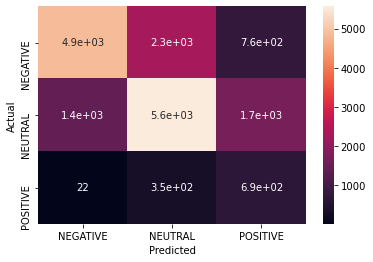

0.6286084799278304

In [29]:
### confusion matrix

df = pd.DataFrame(Pre_COVID, columns=['Sentiment','sentiment_category'])
confusion_matrix = pd.crosstab(df['Sentiment'], df['sentiment_category'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()
accuracy_score(df['Sentiment'], df['sentiment_category'])                                 

## Lockdown

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in lockdown['Message_clean'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

@ thakur_shivangi So , Ola and Uber On ... right ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
@ _vivek @ UberINSupport @ Uber_India @ Uber_Support It seem both dont operate during the official curfew hours from 9 PM till 5 AM .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
@ _vivek @ UberINSupport @ Uber_India @ Uber_Support I be not take Uber or Ola . Tried advance book but it say `` outside city limit '' . Booked a pvt taxi .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
@ atulrajput87 Hey , while the propose restrictions set in accordance to the Govt still stand , we have resume our service , redefine safety and be now operational . Please check the Uber app for availability . Read more t.uber.com/gakjc .
compound: 0.6249, neg: 0.0, neu: 0.866, pos: 0.134, 
@ goswami_h Hey , while the propose restrictions set in accordance to the Govt still stand , we have resume our service , redefine safety and be now operational . Please check the Uber app for availability . Read more t.uber.c

In [31]:
lockdown_f = [r for r in lockdown['Message_clean'] if pd.notnull(r)]
pscores = [sid.polarity_scores(comment) for comment in lockdown_f]

In [32]:
scored_lockdown_f = pd.DataFrame()
scored_lockdown_f['Message'] = [r for r in lockdown_f]
scored_lockdown_f['compound'] = [score['compound'] for score in pscores]
scored_lockdown_f['negativity'] = [score['neg'] for score in pscores]
scored_lockdown_f['neutrality'] = [score['neu'] for score in pscores]
scored_lockdown_f['positivity'] = [score['pos'] for score in pscores]

In [33]:
## classifying sentiments based on compound score
lockdown["sentiment_category"] = ['POSITIVE' if SCORE > 0.6 
                          else 'NEGATIVE' if SCORE < -0.05 
                              else 'NEUTRAL' 
                                  for SCORE in scored_lockdown_f['compound']]

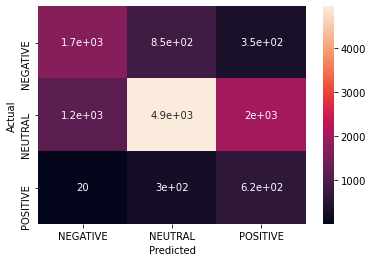

0.6047269083013195

In [34]:
# confusion Matrix
df = pd.DataFrame(lockdown, columns=['Sentiment','sentiment_category'])
confusion_matrix = pd.crosstab(df['Sentiment'], df['sentiment_category'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()
accuracy_score(df['Sentiment'], df['sentiment_category'])                                

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in Post_lockdown['Message_clean'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

@ FasBeam They do sell well to OLA and UBER
compound: 0.2732, neg: 0.0, neu: 0.792, pos: 0.208, 
Vehicle not clean , Hence demand for refund . Not give my hard earn single rupee . @ Uber @ Uber_Support @ narendramodi pic.twitter.com/AJiIDx08Hf
compound: -0.1511, neg: 0.113, neu: 0.753, pos: 0.134, 
@ NaanOfficial I wont say ola uber to get ur FB ...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A rupee save be a rupee more in the earner 's pocket . One step at a time . @ Uber_India have partner with @ Shell_India to bring exclusive benefit for drivers on fuel , lubricants , coolants , car care etc across multiple state . # DriverAtHeart thehindubusinessline.com/economy/logist
compound: 0.872, neg: 0.0, neu: 0.752, pos: 0.248, 
@ Uber @ Uber_Support The driver inform that UPI be not select so I have to make payment . Now , when I open my app to book any ride its give me an error to complete the pending payment . Would request you to validate the complete trip transaction with driver .
c

In [36]:
Post_lockdown_f = [r for r in Post_lockdown['Message_clean'] if pd.notnull(r)]
pscores = [sid.polarity_scores(comment) for comment in Post_lockdown_f]

In [37]:
scored_Post_lockdown_f = pd.DataFrame()
scored_Post_lockdown_f['Message'] = [r for r in Post_lockdown_f]
scored_Post_lockdown_f['compound'] = [score['compound'] for score in pscores]
scored_Post_lockdown_f['negativity'] = [score['neg'] for score in pscores]
scored_Post_lockdown_f['neutrality'] = [score['neu'] for score in pscores]
scored_Post_lockdown_f['positivity'] = [score['pos'] for score in pscores]

In [38]:
## classifying sentiments based on compound score
Post_lockdown["sentiment_category"] = ['POSITIVE' if SCORE > 0.60
                          else 'NEGATIVE' if SCORE < -0.05
                              else 'NEUTRAL' 
                                  for SCORE in scored_Post_lockdown_f['compound']]

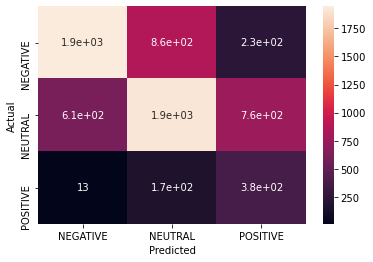

0.6156081964830693

In [39]:
##confusion matrix
df = pd.DataFrame(Post_lockdown, columns=['Sentiment','sentiment_category'])
confusion_matrix = pd.crosstab(df['Sentiment'], df['sentiment_category'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()
accuracy_score(df['Sentiment'], df['sentiment_category'])                                

In [40]:
(Pre_COVID['sentiment_category'].value_counts()/len(Pre_COVID))*100

NEUTRAL     46.380244
NEGATIVE    35.808525
POSITIVE    17.811231
Name: sentiment_category, dtype: float64

In [41]:
(lockdown['sentiment_category'].value_counts()/len(lockdown))*100

NEUTRAL     50.851846
POSITIVE    24.878904
NEGATIVE    24.269250
Name: sentiment_category, dtype: float64

In [42]:
(Post_lockdown['sentiment_category'].value_counts()/len(Post_lockdown))*100

NEUTRAL     42.799012
NEGATIVE    37.276559
POSITIVE    19.924430
Name: sentiment_category, dtype: float64

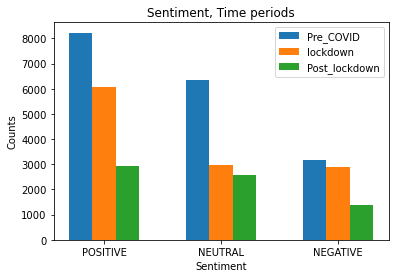

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

index = np.arange(3)
bar_width = 0.2
fig, ax = plt.subplots()

Pre_COVID_1 = ax.bar(index , Pre_COVID['sentiment_category'].value_counts(), bar_width, label = "Pre_COVID")
lockdown_1 = ax.bar(index +0.2, lockdown['sentiment_category'].value_counts(),bar_width, label ="lockdown")
Post_lockdown_1 = ax.bar(index + 0.4, Post_lockdown['sentiment_category'].value_counts(),bar_width, label ="Post_lockdown")

ax.set_xlabel('Sentiment')
ax.set_ylabel('Counts')
ax.set_title('Sentiment, Time periods')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(["POSITIVE", "NEUTRAL", "NEGATIVE"])
ax.legend()
plt.show()


### Afinn Scores_Pre-Covid

In [44]:
afinn = Afinn()

In [45]:
Pre_COVID['afinn_score'] = Pre_COVID["Message_clean"].apply(afinn.score)

Pre_COVID["sentiment_category"] = ['POSITIVE' if SCORE > 0 
                          else 'NEGATIVE' if SCORE < 0 
                              else 'NEUTRAL' 
                                  for SCORE in Pre_COVID['afinn_score']]

In [46]:
Pre_COVID

,Message,Sentiment,Message_clean,sentiment_category,afinn_score
0,@Uber_Support Thanks for the support and looki...,POSITIVE,@ Uber_Support Thanks for the support and look...,POSITIVE,4.0
1,@Uber_Support i believe you should start showi...,NEGATIVE,@ Uber_Support i believe you should start show...,NEGATIVE,-4.0
2,@Uber_India why its so tuff to reach your cust...,NEGATIVE,@ Uber_India why its so tuff to reach your cus...,POSITIVE,7.0
3,"@ola_supports @MertyMerriott Seems blocked, I ...",NEGATIVE,"@ ola_supports @ MertyMerriott Seems block , I...",NEUTRAL,0.0
4,"@khanumarfa Did you get it? But tudwa do, gh...",NEUTRAL,"@ khanumarfa Did you get it ? But tudwa do ,...",NEUTRAL,0.0
...,...,...,...,...,...
17731,@Uber_Support,NEUTRAL,@ Uber_Support,NEUTRAL,0.0
17732,@Gulrose_views @UnSubtleDesi Lol But Ola ho Ub...,POSITIVE,@ Gulrose_views @ UnSubtleDesi Lol But Ola ho ...,POSITIVE,6.0
17733,"@luciferxgod Had my earplugs on, couldn't hear...",NEGATIVE,"@ luciferxgod Had my earplugs on , could n't h...",NEGATIVE,-6.0
17734,"To top off last year, Here is my mom being Ube...",NEUTRAL,"To top off last year , Here be my mom be Uber ...",POSITIVE,5.0


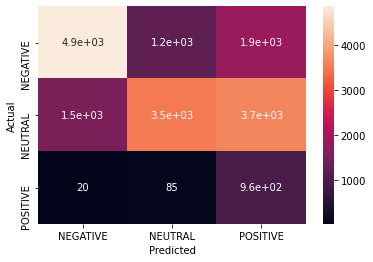

0.5268380694632386

In [47]:
df = pd.DataFrame(Pre_COVID, columns=['Sentiment','sentiment_category'])


confusion_matrix = pd.crosstab(df['Sentiment'], df['sentiment_category'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()


accuracy_score(df['Sentiment'], df['sentiment_category'])
                                 

### Afinn Scores_lockdown

In [48]:
lockdown['afinn_score'] = lockdown["Message_clean"].apply(afinn.score)

lockdown["sentiment_category"] = ['POSITIVE' if SCORE > 0 
                          else 'NEGATIVE' if SCORE < 0 
                              else 'NEUTRAL' 
                                  for SCORE in lockdown['afinn_score']]

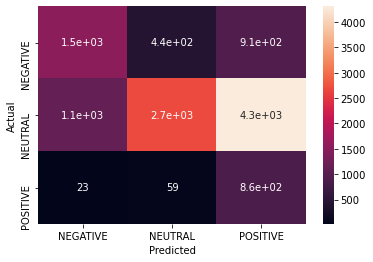

0.42525471855687325

In [49]:
df = pd.DataFrame(lockdown, columns=['Sentiment','sentiment_category'])


confusion_matrix = pd.crosstab(df['Sentiment'], df['sentiment_category'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()


accuracy_score(df['Sentiment'], df['sentiment_category'])

### Afinn Scores_Post_lockdown

In [50]:
Post_lockdown['afinn_score'] = Post_lockdown["Message_clean"].apply(afinn.score)

Post_lockdown["sentiment_category"] = ['POSITIVE' if SCORE > 0 
                          else 'NEGATIVE' if SCORE < 0 
                              else 'NEUTRAL' 
                                  for SCORE in Post_lockdown['afinn_score']]

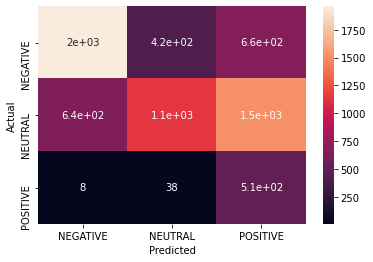

0.5241970643801773

In [51]:
df = pd.DataFrame(Post_lockdown, columns=['Sentiment','sentiment_category'])


confusion_matrix = pd.crosstab(df['Sentiment'], df['sentiment_category'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()


accuracy_score(df['Sentiment'], df['sentiment_category'])

In [52]:
(Pre_COVID['sentiment_category'].value_counts()/len(Pre_COVID))*100

POSITIVE    36.614795
NEGATIVE    36.253947
NEUTRAL     27.131258
Name: sentiment_category, dtype: float64

In [53]:
(lockdown['sentiment_category'].value_counts()/len(lockdown))*100

POSITIVE    50.776683
NEUTRAL     26.691164
NEGATIVE    22.532153
Name: sentiment_category, dtype: float64

In [54]:
(Post_lockdown['sentiment_category'].value_counts()/len(Post_lockdown))*100

POSITIVE    39.005958
NEGATIVE    37.857869
NEUTRAL     23.136172
Name: sentiment_category, dtype: float64

In [55]:

### plotting the word clouds

from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

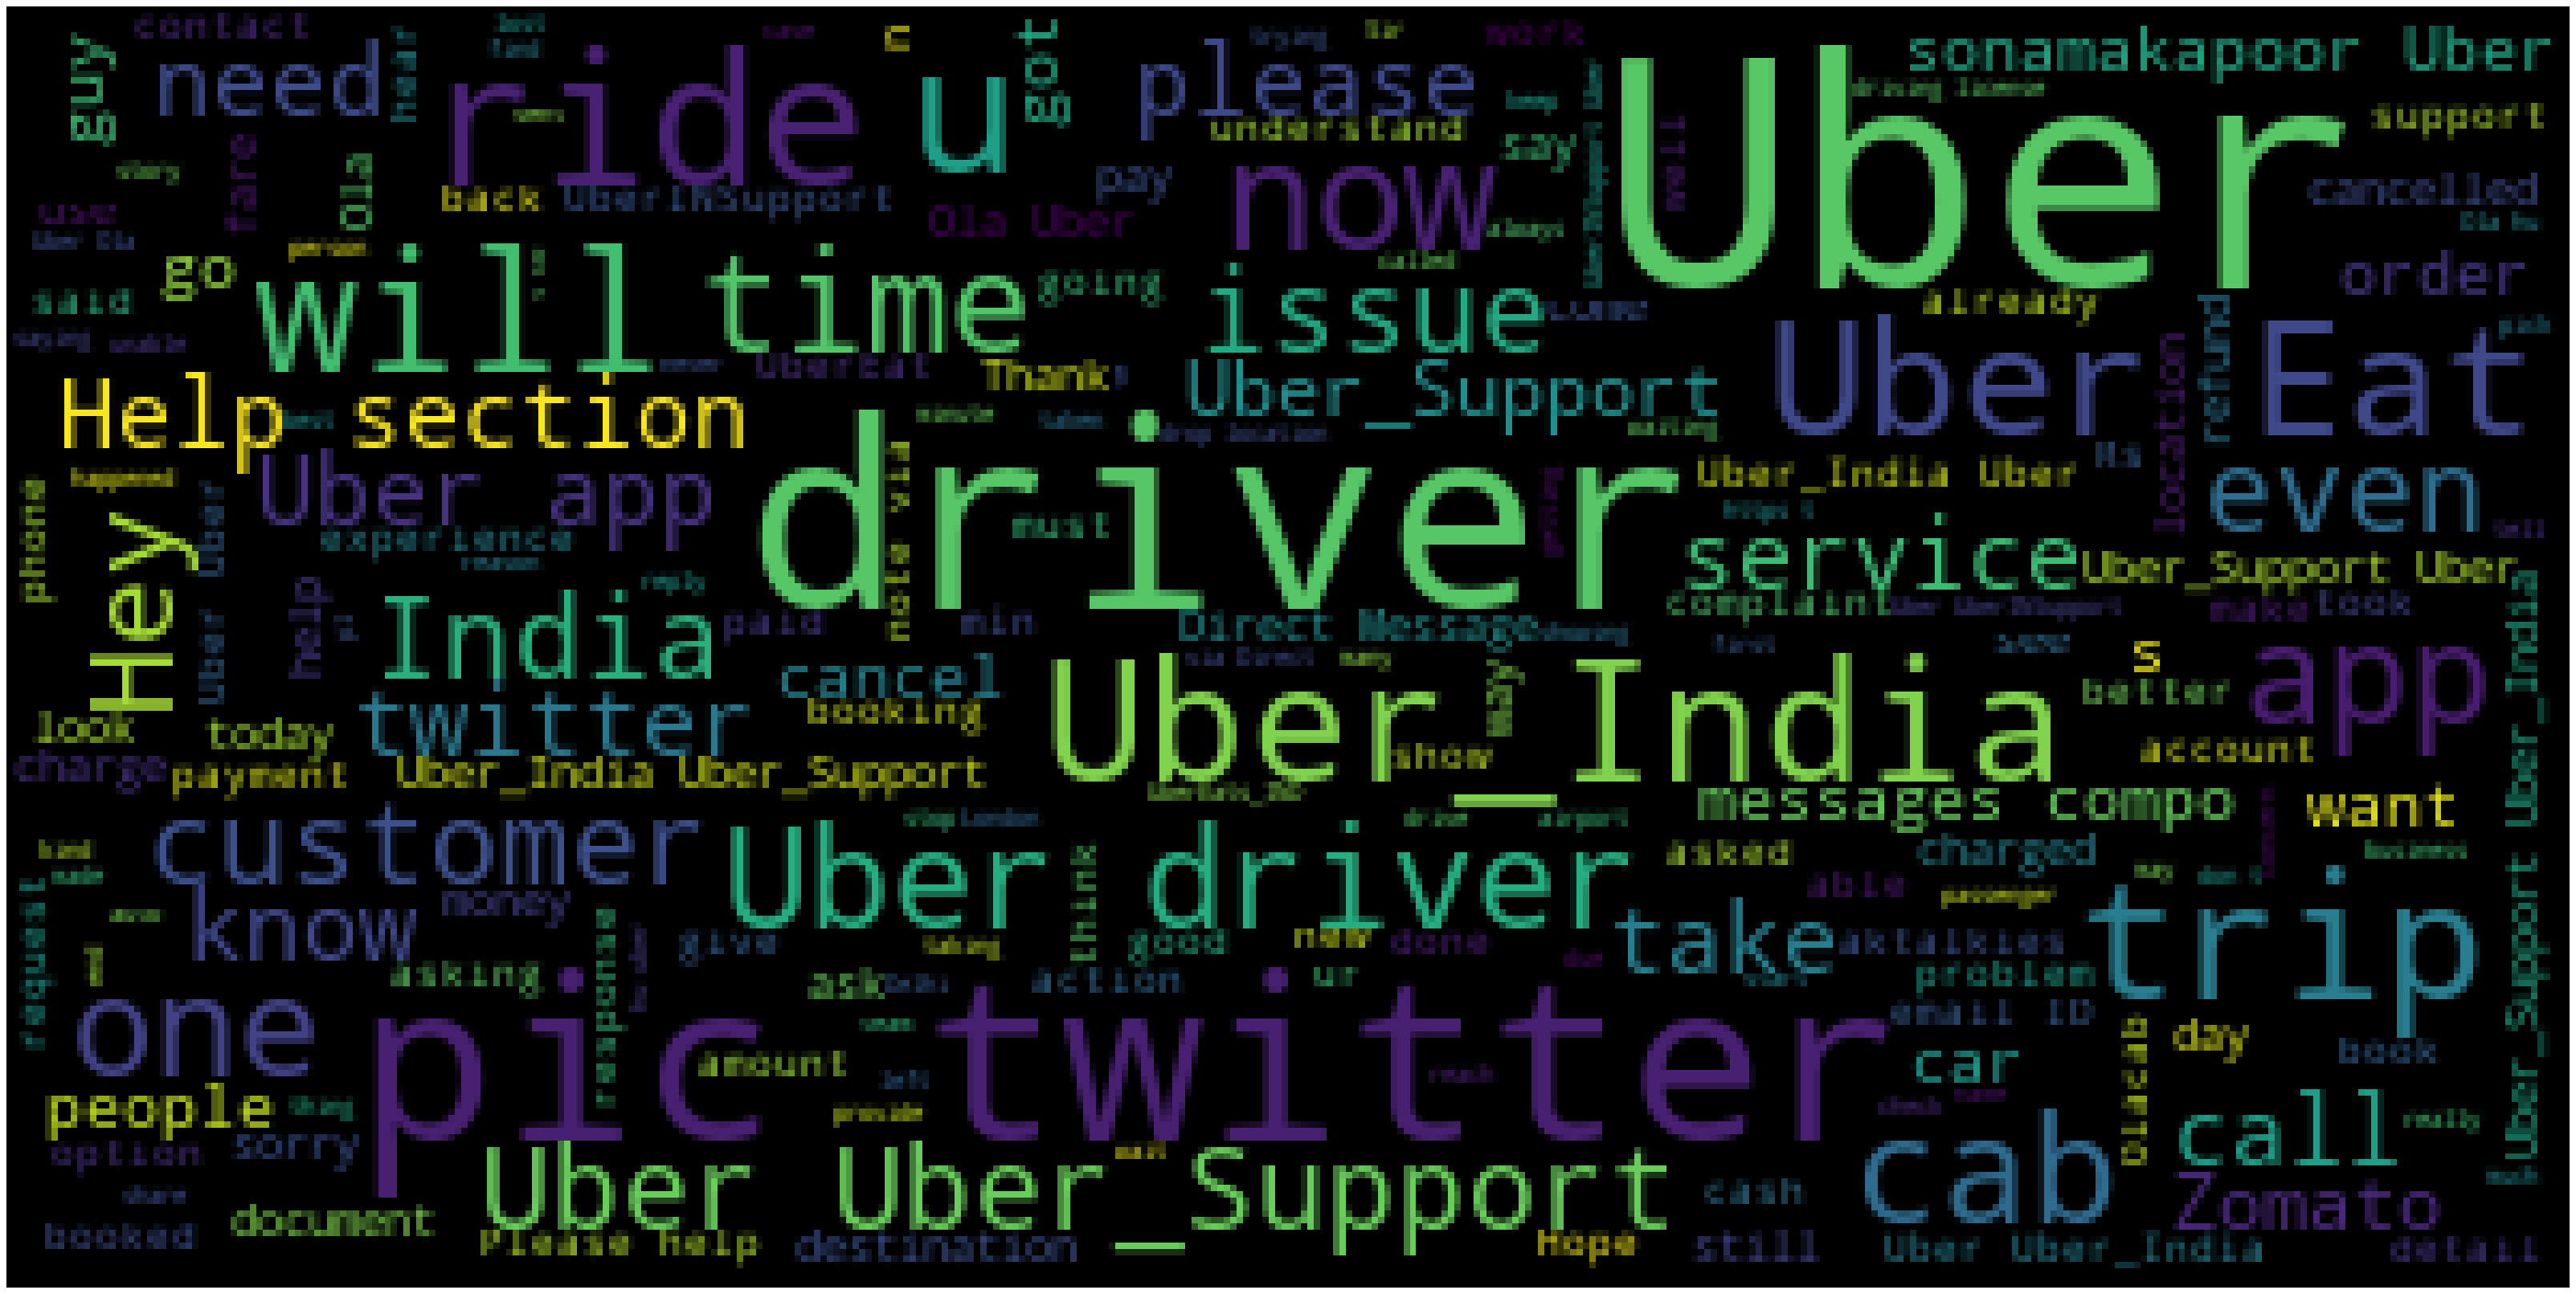

In [56]:
### Word Cloud for Positive Reviews
wc(Pre_COVID['Message'],'black','Common Words' )

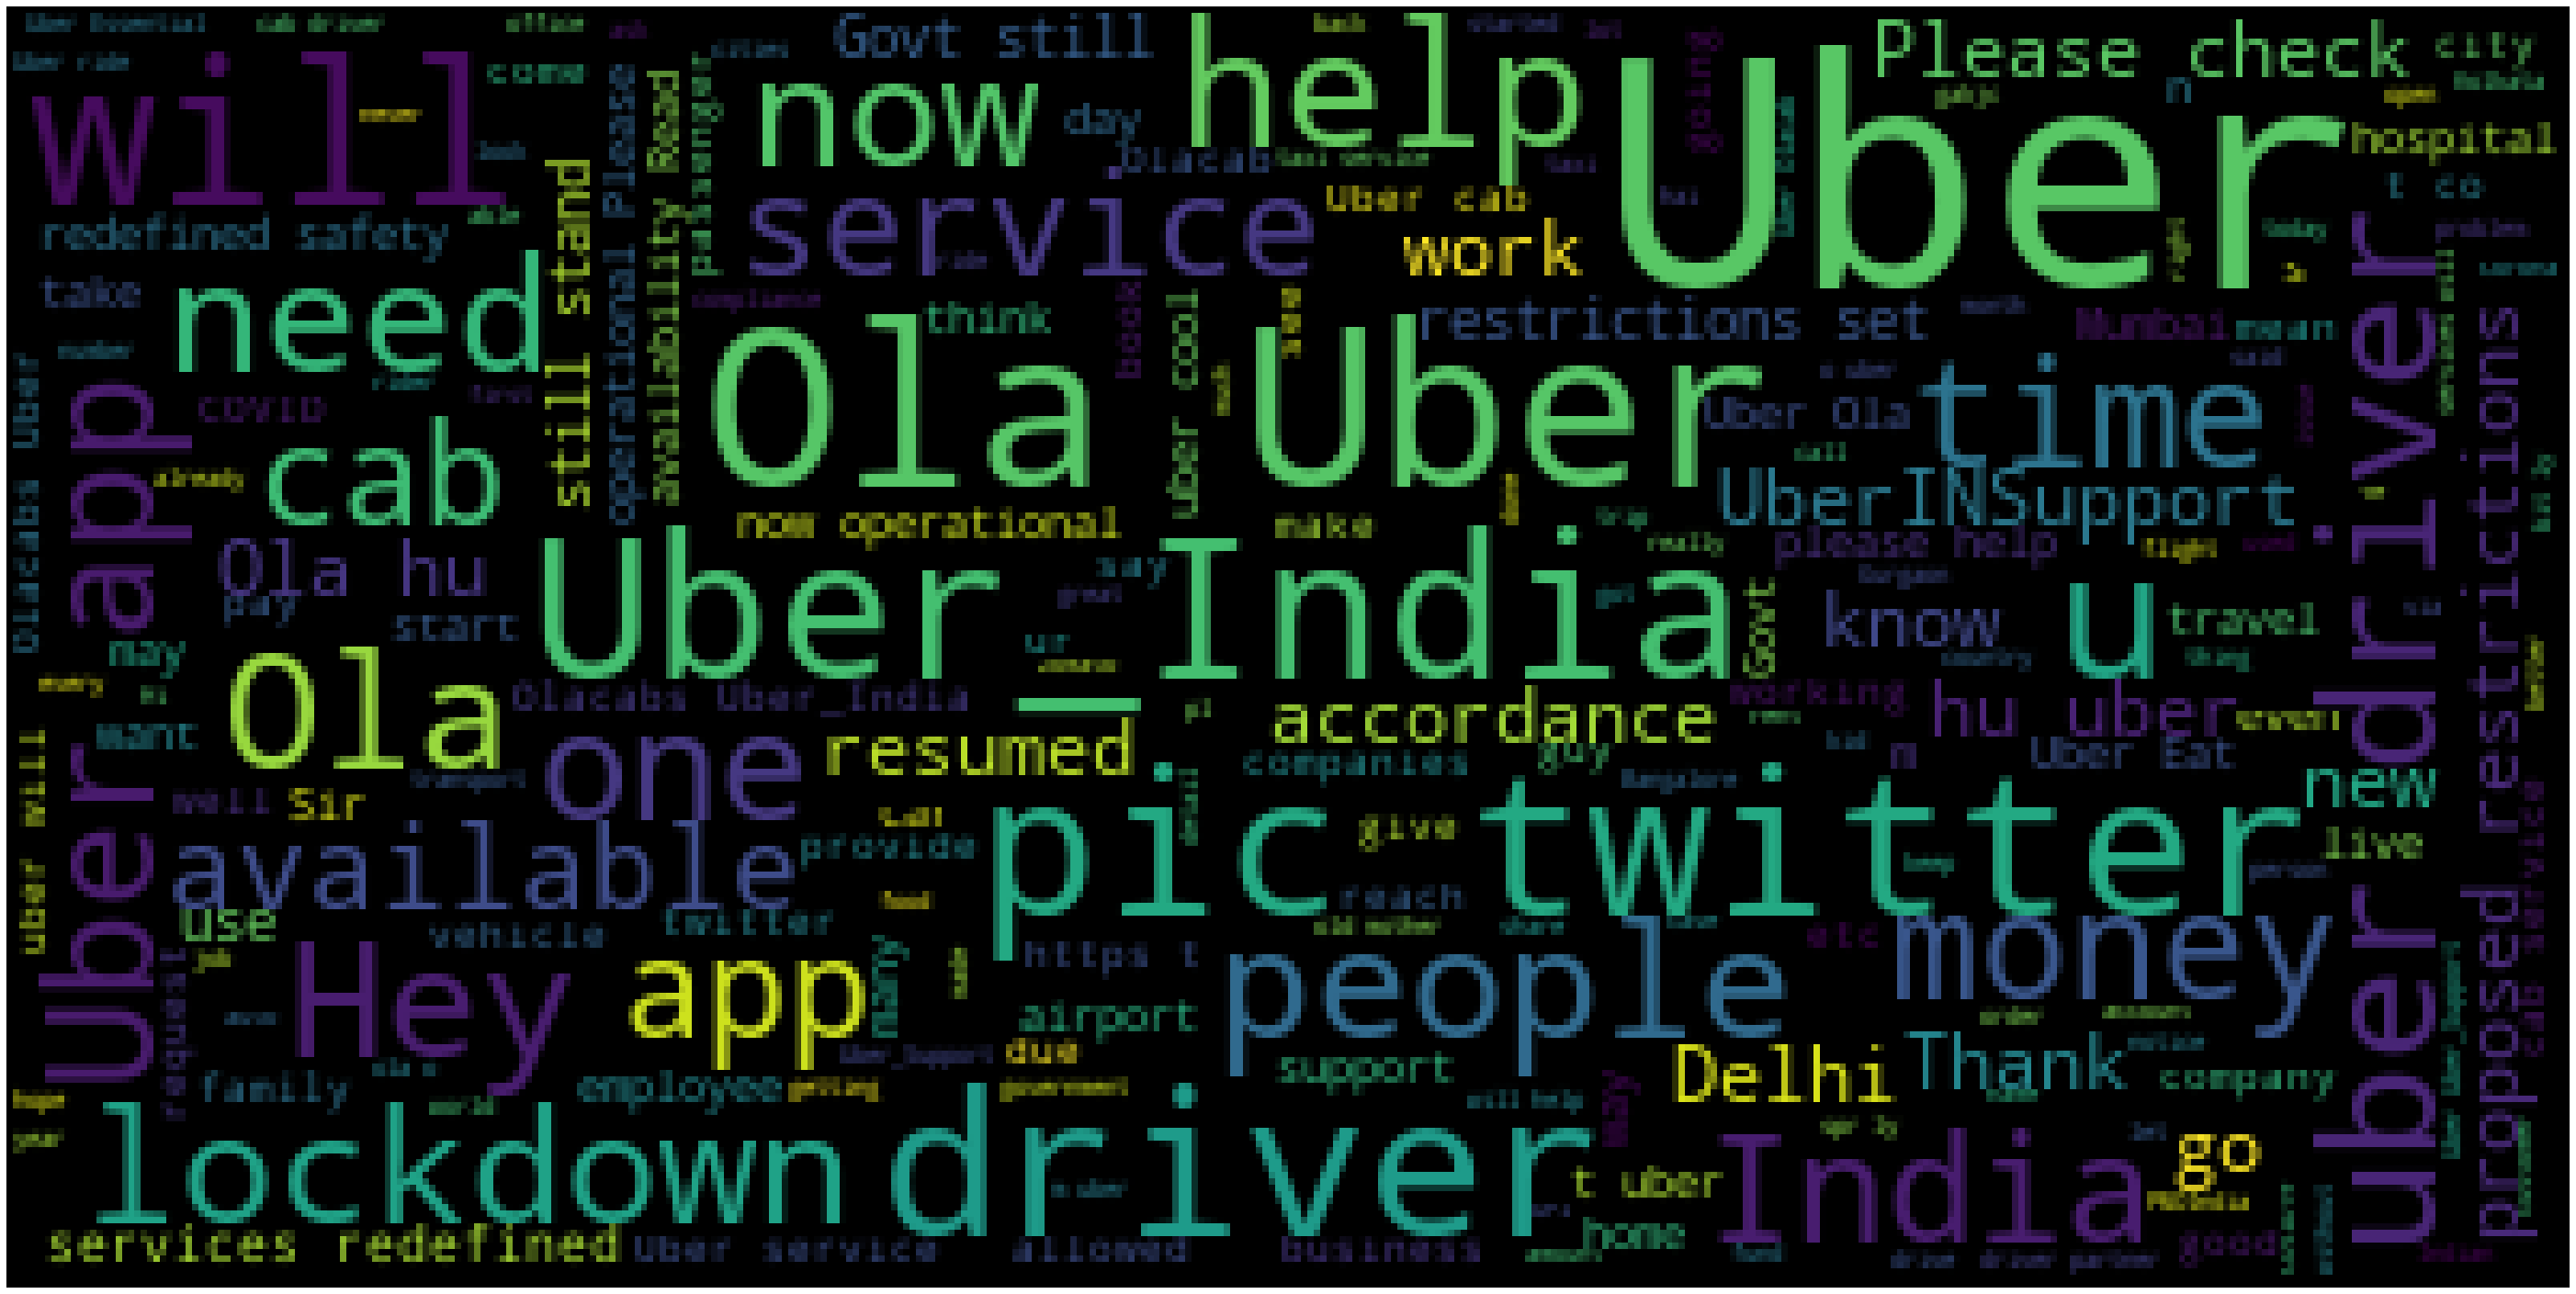

In [57]:
### Word Cloud for Neutral Reviews
wc(lockdown['Message'],'black','Common Words' )

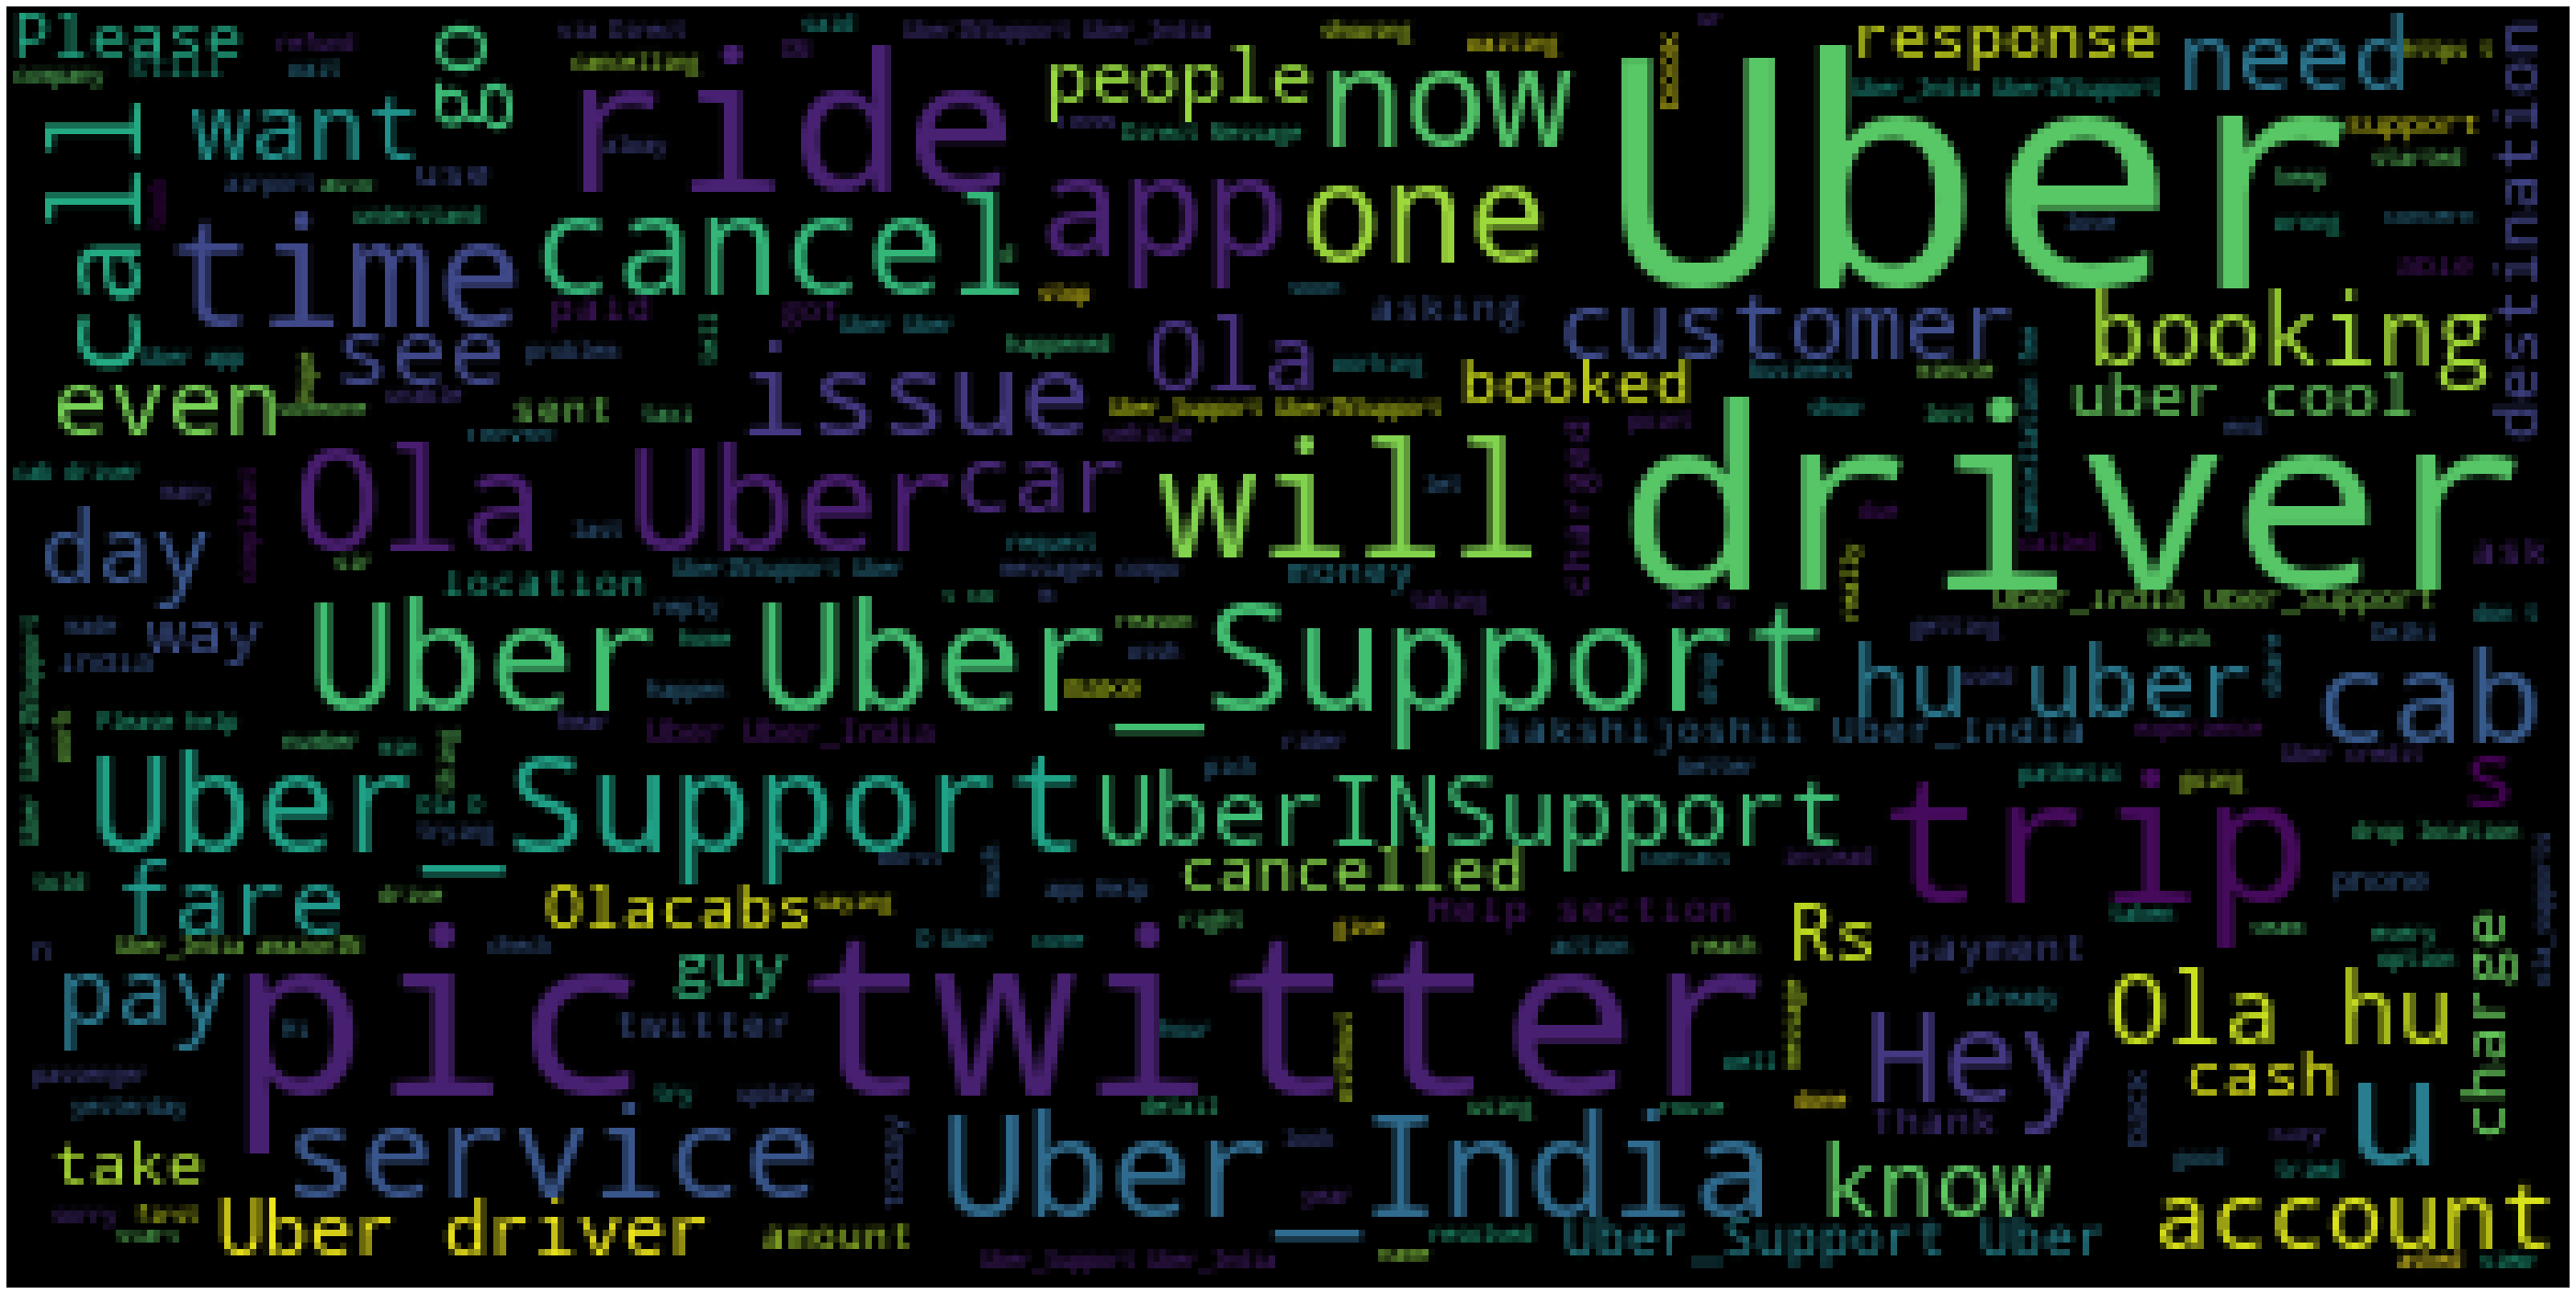

In [58]:
### Word Cloud for Negative Reviews
wc(Post_lockdown['Message'],'black','Common Words' )

In [59]:
### Cleaning our data..Removing punctuations, numbers and Special characters

def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

Pre_COVID = clean_text(Pre_COVID, 'Message', 'Message_clean')
lockdown = clean_text(lockdown, 'Message', 'Message_clean')
Post_lockdown = clean_text(Post_lockdown, 'Message', 'Message_clean')

In [60]:
### Removing stop words
stop= set(stopwords.words('english'))
stop.update(['.',';',',','"',':','-','taj', 'hotel',"mahal"])


Pre_COVID['Message_clean']= Pre_COVID['Message_clean'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

lockdown['Message_clean']= lockdown['Message_clean'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Post_lockdown['Message_clean']= Post_lockdown['Message_clean'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Post_lockdown['Message_clean']

0                                      sell well ola uber
1       vehicle clean hence demand refund given hard e...
2                             wont say ola uber get ur fb
3       rupee saved rupee earners pockets one step tim...
4       support driver informed upi selected make paym...
                              ...                        
6876                   support helping canada one helping
6877    india booked please take home guys making fun ...
6878                               ola uber prob resolved
6879    aaaaaaaaaat uber cool kalyan babu shruthi newy...
6880    uber cool vakeelsaab teaser sankranti newyearw...
Name: Message_clean, Length: 6881, dtype: object

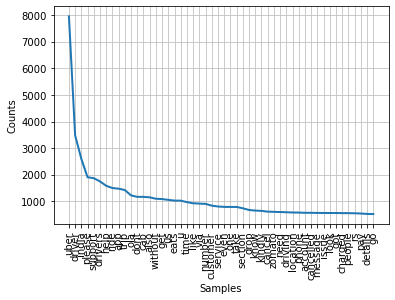

In [61]:
#### Getting the word frequency plot

string =[''.join(review) for review in Pre_COVID['Message_clean'].values]
string1= str([''.join(string)])
words= nltk.word_tokenize(string1)
fdist = FreqDist(words)
fdist.plot(50)

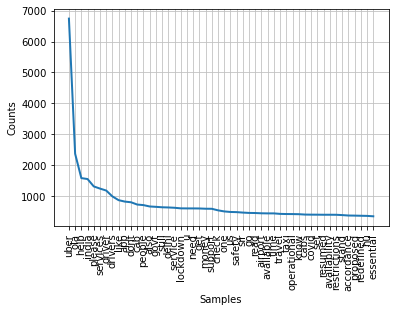

In [62]:
#### Getting the word frequency plot

string =[''.join(review) for review in lockdown['Message_clean'].values]
string1= str([''.join(string)])
words= nltk.word_tokenize(string1)
fdist = FreqDist(words)
fdist.plot(50)

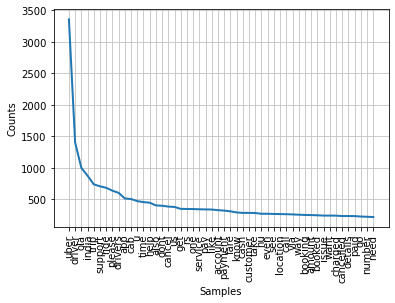

In [63]:
#### Getting the word frequency plot

string =[''.join(review) for review in Post_lockdown['Message_clean'].values]
string1= str([''.join(string)])
words= nltk.word_tokenize(string1)
fdist = FreqDist(words)
fdist.plot(50)

In [64]:
# Tokenizing the text

Pre_COVID['Message_clean'] = Pre_COVID['Message_clean'].apply(word_tokenize)
lockdown['Message_clean'] = lockdown['Message_clean'].apply(word_tokenize)
Post_lockdown['Message_clean'] = Post_lockdown['Message_clean'].apply(word_tokenize)


In [65]:
## Applying lemmatization on our text
ls= WordNetLemmatizer()
Pre_COVID['Message_clean'] = Pre_COVID['Message_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])

lockdown['Message_clean'] = lockdown['Message_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])

Post_lockdown['Message_clean'] = Post_lockdown['Message_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])


# LDA Modelling using Gensim Package

## Pre - COVID data extraction timeline (Jan 2020)

In [66]:
text = [" ".join(review) for review in Pre_COVID['Message_clean'].values]
# Create Dictionary
id2word = corpora.Dictionary(Pre_COVID['Message_clean'])

# Create Corpus
texts = Pre_COVID['Message_clean']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1)]]


In [67]:
#format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('case', 1), ('immediately', 1), ('look', 1), ('support', 2), ('thank', 1)]]

In [68]:
## Building a function to plot the coherence values for the Topics numbers
def compute_coherence_values(dictionary, corpus, texts, start,limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state = num_topics +100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

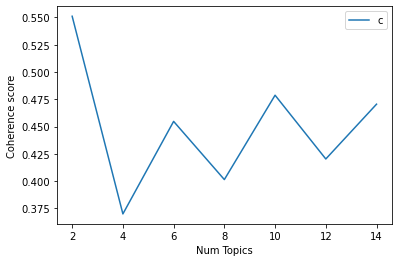

In [69]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=15, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=15; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [70]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [71]:
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics(num_words=15))
doc_lda = lda_model[corpus]

[(0,
  '0.035*"thank" + 0.024*"ind" + 0.019*"lose" + 0.017*"mins" + 0.016*"kind" + '
  '0.014*"document" + 0.014*"receive" + 0.011*"hope" + 0.010*"available" + '
  '0.009*"safety" + 0.009*"yet" + 0.008*"ac" + 0.008*"wont" + 0.008*"gadkari" '
  '+ 0.008*"wish"'),
 (1,
  '0.072*"app" + 0.048*"via" + 0.046*"order" + 0.041*"look" + 0.040*"section" '
  '+ 0.036*"hey" + 0.032*"help" + 0.027*"us" + 0.026*"note" + 0.023*"drop" + '
  '0.023*"team" + 0.022*"concern" + 0.022*"hear" + 0.020*"sorry" + '
  '0.019*"work"'),
 (2,
  '0.068*"uber" + 0.051*"support" + 0.044*"india" + 0.031*"driver" + '
  '0.017*"get" + 0.017*"ride" + 0.017*"take" + 0.015*"trip" + 0.015*"cancel" + '
  '0.015*"drivers" + 0.013*"cab" + 0.013*"service" + 0.012*"charge" + '
  '0.011*"time" + 0.011*"pay"'),
 (3,
  '0.034*"ola" + 0.026*"kindly" + 0.023*"use" + 0.022*"like" + 0.021*"u" + '
  '0.017*"people" + 0.017*"well" + 0.012*"able" + 0.010*"happen" + '
  '0.010*"year" + 0.010*"way" + 0.010*"understand" + 0.010*"leave" + '
 

In [72]:
# Building a function to get the dominant topics for the documents.
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4138,"uber, support, india, driver, get, ride, take,...","[support, thank, support, look, case, immediat..."
1,1,2.0,0.4788,"uber, support, india, driver, get, ride, take,...","[support, believe, start, show, drop, location..."
2,2,2.0,0.4694,"uber, support, india, driver, get, ride, take,...","[india, tuff, reach, customer, care, one, unne..."
3,3,2.0,0.6133,"uber, support, india, driver, get, ride, take,...","[support, seem, block, dont, know, happen, sup..."
4,4,2.0,0.3485,"uber, support, india, driver, get, ride, take,...","[get, tudwa, ghazwaehind, tukde, tukde, inshaa..."
5,5,2.0,0.4602,"uber, support, india, driver, get, ride, take,...","[rajeshpillai, happen, india]"
6,6,1.0,0.5322,"app, via, order, look, section, hey, help, us,...","[hey, navneet, sorry, hear, trouble, specific,..."
7,7,2.0,0.2844,"uber, support, india, driver, get, ride, take,...","[hello, get, promotional, mail, relate, uber, ..."
8,8,2.0,0.6491,"uber, support, india, driver, get, ride, take,...","[shud, customer, pay, cancellation, charge, ve..."
9,9,2.0,0.3982,"uber, support, india, driver, get, ride, take,...","[india, hello, get, offer, mail, also, dont, k..."


In [73]:
# Perplexity, Lower is better
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Coherence Score, hei
coherence_model_lda = CoherenceModel(model=lda_model, texts=Pre_COVID['Message_clean'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.078024099116154

Coherence Score:  0.4801426066390892


In [74]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False,mds ='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       1.465019 -47.625065       1        1   8.357353
1      54.854797 -36.476795       2        1   8.139531
2      32.212929 -61.444572       3        1  45.731880
3       5.111096 -14.110332       4        1  17.105658
4      26.350170 -33.374702       5        1   7.730570
5      38.109818  -7.222781       6        1  12.935008, topic_info=                        Term         Freq        Total Category  logprob  \
3                    support  6093.000000  6093.000000  Default  30.0000   
17                    please  2166.000000  2166.000000  Default  29.0000   
35                     india  5259.000000  5259.000000  Default  28.0000   
76                       app  1521.000000  1521.000000  Default  27.0000   
79                      help  2044.000000  2044.000000  Default  26.0000   
..                       ...          ...          ...      ...      ...   
503                   assist   206.752823   207.556854   Topic6  -5.0926   
79                      help  1367.382324  2044.978760   Topic6  -3.2035   
90                        us   648.499329  1220.262451   Topic6  -3.9495   
89   twittercommessagescompo   341.256866   686.965698   Topic6  -4.5915   
53                      uber   434.571991  8814.738281   Topic6  -4.3498   

     loglift  
3    30.0000  
17   29.0000  
35   28.0000  
76   27.0000  
79   26.0000  
..       ...  
503   2.0414  
79    1.6427  
90    1.4131  
89    1.3456  
53   -0.9646  

[224 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
356       4  0.998781     able
1010      1  0.994050       ac
92        6  0.999303  account
876       2  0.998467  address
413       5  0.994620    allow
...     ...       ...      ...
427       2  0.999056     work
663       6  0.999072    worst
799       4  0.998765     year
173       1  0.994214      yet
366       5  0.997447   zomato

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

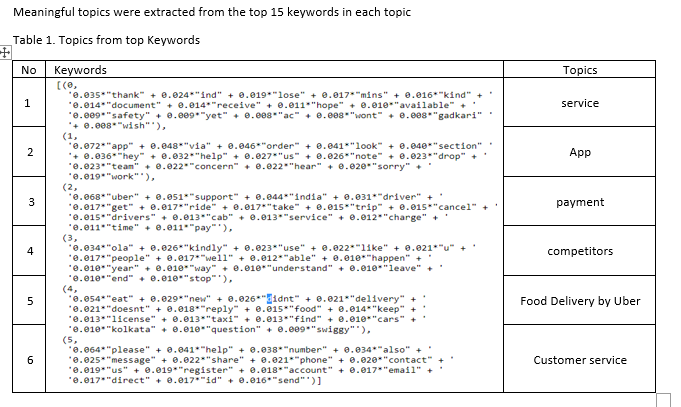

## Lockdown data extraction timeline (March 25th – 31st May 2020)

In [75]:
text = [" ".join(review) for review in lockdown['Message_clean'].values]
# Create Dictionary
id2word = corpora.Dictionary(lockdown['Message_clean'])

# Create Corpus
texts = lockdown['Message_clean']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [76]:
#format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ola', 1), ('onright', 1), ('shivangi', 1), ('uber', 1)]]

In [77]:
## Building a function to plot the coherence values for the Topics numbers
def compute_coherence_values(dictionary, corpus, texts, start,limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,random_state = num_topics+100 )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

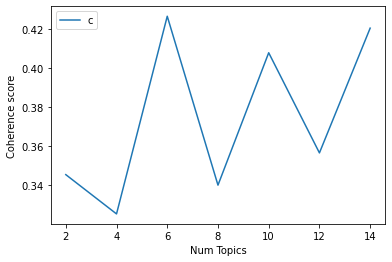

In [78]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=15, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=15; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [79]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [80]:
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.052*"india" + 0.047*"service" + 0.027*"please" + 0.022*"cab" + '
  '0.022*"dont" + 0.021*"support" + 0.021*"need" + 0.015*"available" + '
  '0.013*"us" + 0.011*"request"'),
 (1,
  '0.043*"government" + 0.042*"delivery" + 0.028*"food" + 0.024*"daily" + '
  '0.022*"many" + 0.022*"transport" + 0.013*"message" + 0.012*"public" + '
  '0.009*"direct" + 0.008*"open"'),
 (2,
  '0.021*"zomato" + 0.019*"covid" + 0.019*"even" + 0.018*"swiggy" + '
  '0.018*"company" + 0.015*"deliver" + 0.014*"n" + 0.013*"business" + '
  '0.011*"im" + 0.011*"indian"'),
 (3,
  '0.040*"give" + 0.038*"essential" + 0.023*"well" + 0.023*"stop" + '
  '0.021*"way" + 0.021*"pls" + 0.018*"order" + 0.015*"employees" + '
  '0.012*"keepitsimpl" + 0.011*"bus"'),
 (4,
  '0.082*"home" + 0.047*"hey" + 0.042*"compliance" + 0.041*"guidelines" + '
  '0.040*"olauber" + 0.029*"govt" + 0.023*"still" + 0.019*"check" + '
  '0.018*"twittercommessagescompo" + 0.018*"issue"'),
 (5,
  '0.091*"uber" + 0.041*"ola" + 0.020*"help" + 0.0

In [81]:
##get the dominant topics for the documents
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.5102,"uber, ola, help, drivers, sir, get, people, dr...","[shivangi, ola, uber, onright]"
1,1,0.0,0.5633,"india, service, please, cab, dont, support, ne...","[vivek, india, support, seem, dont, operate, o..."
2,2,5.0,0.6624,"uber, ola, help, drivers, sir, get, people, dr...","[vivek, india, support, take, uber, ola, try, ..."
3,3,4.0,0.5190,"home, hey, compliance, guidelines, olauber, go...","[hey, propose, restrictions, set, accordance, ..."
4,4,4.0,0.5025,"home, hey, compliance, guidelines, olauber, go...","[h, hey, propose, restrictions, set, accordanc..."
5,5,0.0,0.4708,"india, service, please, cab, dont, support, ne...","[support, indianeed, outststion, cab, igi, air..."
6,6,5.0,0.5735,"uber, ola, help, drivers, sir, get, people, dr...","[chant, ola, uber]"
7,7,5.0,0.6268,"uber, ola, help, drivers, sir, get, people, dr...","[support, iam, use, uber, driver, app, working..."
8,8,4.0,0.5187,"home, hey, compliance, guidelines, olauber, go...","[hey, propose, restrictions, set, accordance, ..."
9,9,5.0,0.3941,"uber, ola, help, drivers, sir, get, people, dr...","[ifat, india, sir, u, connect, similar, driver..."


In [82]:
# Perplexity, Lower is better
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Coherence Score, hei
coherence_model_lda = CoherenceModel(model=lda_model, texts=lockdown['Message_clean'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.55136618214926

Coherence Score:  0.3265682414721082


In [83]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False,mds ='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       1.465019 -47.625065       1        1  25.964424
1      54.854797 -36.476795       2        1   7.631372
2      32.212929 -61.444572       3        1  10.705585
3       5.111096 -14.110332       4        1   5.867686
4      26.350170 -33.374702       5        1   5.151073
5      38.109818  -7.222781       6        1  44.679859, topic_info=        Term         Freq        Total Category  logprob  loglift
3       uber  7415.000000  7415.000000  Default  30.0000  30.0000
7      india  2457.000000  2457.000000  Default  29.0000  29.0000
39   service  2240.000000  2240.000000  Default  28.0000  28.0000
0        ola  3354.000000  3354.000000  Default  27.0000  27.0000
264     home   764.000000   764.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
17      city   416.896576   417.673096   Topic6  -5.2702   0.8038
245     come   382.694489   383.460052   Topic6  -5.3558   0.8036
317    think   380.902466   381.668518   Topic6  -5.3604   0.8036
114     help  1650.729248  1724.694458   Topic6  -3.8940   0.7618
208     also   735.971497   783.547974   Topic6  -4.7018   0.7430

[216 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
230       6  0.998774    allow
208       1  0.059984     also
208       6  0.939317     also
4209      3  0.988498    april
5092      5  0.951542    assam
...     ...       ...      ...
3681      5  0.993873      wed
73        4  0.995238     well
74        6  0.998787     work
1402      3  0.996841  workers
1261      3  0.997908   zomato

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

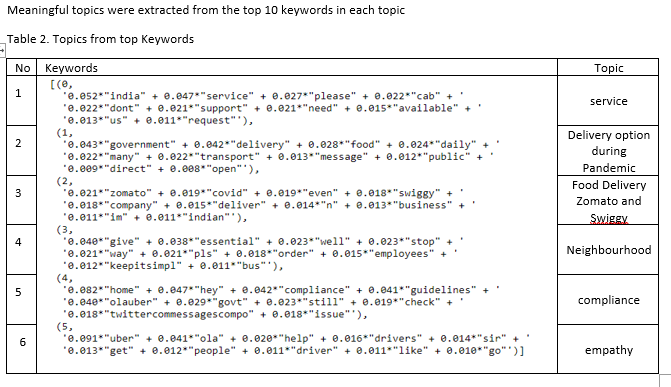

## Post lockdown data extraction timeline (Jan 2021)

In [84]:
text = [" ".join(review) for review in Post_lockdown['Message_clean'].values]
# Create Dictionary
id2word = corpora.Dictionary(Post_lockdown['Message_clean'])

# Create Corpus
texts = Post_lockdown['Message_clean']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [85]:
#format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ola', 1), ('sell', 1), ('uber', 1), ('well', 1)]]

In [86]:
## Building a function to plot the coherence values for the Topics numbers
def compute_coherence_values(dictionary, corpus, texts, start,limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state = num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

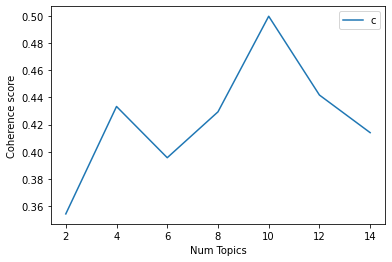

In [87]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=15, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=15; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [88]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [89]:
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics(num_words=15))
doc_lda = lda_model[corpus]

[(0,
  '0.065*"uber" + 0.038*"ola" + 0.015*"u" + 0.011*"people" + 0.010*"like" + '
  '0.009*"cool" + 0.009*"cant" + 0.008*"work" + 0.007*"make" + 0.006*"hu" + '
  '0.006*"shout" + 0.006*"ur" + 0.006*"think" + 0.006*"one" + 0.005*"see"'),
 (1,
  '0.021*"india" + 0.020*"app" + 0.019*"look" + 0.015*"one" + 0.013*"money" + '
  '0.012*"uber" + 0.012*"experience" + 0.012*"please" + 0.011*"car" + '
  '0.009*"pls" + 0.009*"understand" + 0.008*"phone" + 0.008*"bad" + '
  '0.008*"use" + 0.008*"hey"'),
 (2,
  '0.035*"uber" + 0.025*"help" + 0.023*"hey" + 0.020*"via" + 0.019*"send" + '
  '0.018*"detail" + 0.018*"way" + 0.017*"account" + 0.017*"response" + '
  '0.015*"also" + 0.013*"section" + 0.013*"see" + 0.013*"able" + '
  '0.012*"message" + 0.011*"thank"'),
 (3,
  '0.041*"support" + 0.030*"uber" + 0.027*"driver" + 0.025*"india" + '
  '0.016*"book" + 0.015*"cancel" + 0.014*"ride" + 0.013*"pay" + 0.013*"charge" '
  '+ 0.013*"time" + 0.012*"trip" + 0.012*"cab" + 0.012*"take" + '
  '0.011*"service" 

In [90]:
##get the dominant topics for the documents
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4571,"uber, ola, u, people, like, cool, cant, work, ...","[sell, well, ola, uber]"
1,1,3.0,0.5584,"support, uber, driver, india, book, cancel, ri...","[vehicle, clean, hence, demand, refund, give, ..."
2,2,0.0,0.5327,"uber, ola, u, people, like, cool, cant, work, ...","[wont, say, ola, uber, get, ur, fb]"
3,3,1.0,0.4275,"india, app, look, one, money, uber, experience...","[rupee, save, rupee, earners, pocket, one, ste..."
4,4,3.0,0.7708,"support, uber, driver, india, book, cancel, ri...","[support, driver, inform, upi, select, make, p..."
5,5,0.0,0.3845,"uber, ola, u, people, like, cool, cant, work, ...","[bar, profile, offender, still, able, view, gl..."
6,6,3.0,0.7510,"support, uber, driver, india, book, cancel, ri...","[support, help, email, team, close, issue, fee..."
7,7,3.0,0.8638,"support, uber, driver, india, book, cancel, ri...","[kolkata, pay, driver, full, amount, last, tri..."
8,8,3.0,0.7223,"support, uber, driver, india, book, cancel, ri...","[hellomy, uber, account, block, without, reaso..."
9,9,0.0,0.7111,"uber, ola, u, people, like, cool, cant, work, ...","[raidcal, islam, use, ola, hu, uber, behead, s..."


In [91]:
# Perplexity, Lower is better
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Coherence Score, hei
coherence_model_lda = CoherenceModel(model=lda_model, texts=Post_lockdown['Message_clean'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.836939764635745

Coherence Score:  0.4714561336812271


In [92]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False,mds ='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      269.562408 -124.803398       1        1  22.267048
1        1.782994 -295.079681       2        1  14.893979
2      220.811432 -343.832123       3        1  14.659217
3       50.533993  -76.050934       4        1  48.179760, topic_info=        Term         Freq        Total Category  logprob  loglift
14   support  2099.000000  2099.000000  Default  30.0000  30.0000
0        ola   889.000000   889.000000  Default  29.0000  29.0000
47    driver  1387.000000  1387.000000  Default  28.0000  28.0000
33     india  1605.000000  1605.000000  Default  27.0000  27.0000
2       uber  3747.000000  3747.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
2       uber  1504.624390  3747.877930   Topic4  -3.5172  -0.1824
196   please   385.011444   726.083374   Topic4  -4.8802   0.0958
500     fare   274.188721   346.329315   Topic4  -5.2196   0.4967
151     dont   266.574097   366.717743   Topic4  -5.2478   0.4113
44       app   266.864685   583.152893   Topic4  -5.2467  -0.0515

[193 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
62        3  0.995379     able
529       2  0.991717       ac
110       3  0.854692  account
110       4  0.143003  account
912       4  0.995497  airport
...     ...       ...      ...
313       1  0.998759     work
878       1  0.980784    world
61        1  0.757042    would
61        4  0.238707    would
600       1  0.982957      yes

[183 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

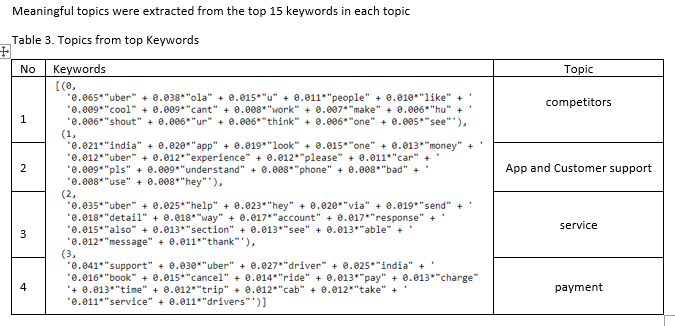

Consumers opinions
1 During the lockdown people expressed their opinion to engage uber’s cab and bikes in the food delivery service.
2. Consumers also tweeted mentioning UBER and Ola to support their drivers who were out of business during Lockdown.
3. Pre and post lockdown had tweets mentioning service and customer support as the cabs were operational during that time and the sentiments are almost similar kind of.
